In [36]:
%reset

In [37]:
#import libraries for plotting fancy graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
organization = [
    "0-verbose",
    "1-medium",
    "2-concise"]

task = 'output/ar'

configurations = [
    "ar_conv_out.pkl",
    "ar_conv_struct_out.pkl",
    "ar_struct_summ_out.pkl",
    "ar_struct_desc_out.pkl",
    "ar_struct_summ_desc_out.pkl",
    "ar_struct_out.pkl"
]

In [39]:
import pickle
outputs = []

for c in configurations:
    output_internal = []
    for o in organization:
        file = (f"{task}/{o}/{c}")
        #open file and append to list
        with open(file, 'rb') as f:
            output_internal.append(pickle.load(f))
    outputs.append(output_internal)

In [40]:
import pickle
import networkx as nx
from process_graphs import extract_graphs, extract_multi_graphs, find_all_undirected_graphlet_instances, get_instance_ratios, find_possible_n_nodes2

with open('data/medium_ubuntu.pkl', 'rb') as f:
    data = pickle.load(f)

In [41]:
graph_set, indeces_connected_graphs = extract_graphs(data)
multi_graph_set = extract_multi_graphs(data)

#save graphlets to file
import pickle

score = {
    "undirected_degree":[],
    "directed_out_degree":[], 
    "multi_out_degree":[]
}

for g, mg in zip(graph_set, multi_graph_set):
    new_g = g.to_undirected()
    #find clustering coefficient of node 0
    score["undirected_degree"].append(new_g.degree(0))
    score["directed_out_degree"].append(g.out_degree(0))
    score["multi_out_degree"].append(mg.out_degree(0))


In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
with open('data/medium_ubuntu_true_addresses.pkl', 'rb') as f:
    gold = pickle.load(f)

out_prob_total = []

for o in outputs:
    out_prob_int = []
    for c in o:
        out_prob = []
        for distrib_cppls, g in zip(c['output_distribution_cppls'], gold):
        
            inv_distrib_cppls = [1/x for x in distrib_cppls]
            norm = sum(inv_distrib_cppls)
            distrib_prob = [x/norm for x in inv_distrib_cppls]
            out_prob.append(distrib_prob[g])
        out_prob_int.append(out_prob)
    
    out_prob_total.append(out_prob_int)

row_total = []

for o in outputs:
    row_int = []
    for c in o:
        row = []
        for d, g in zip(c['row'], gold):
            row.append(d)
        row_int.append(row)

    row_total.append(row_int)

In [47]:
accuracies = []

for c in row_total:
    accuracy_int = []
    for o in c:
        x = [o_i for o_i in o]
        accuracy_int.append(sum(x)/len(x))
    accuracies.append(accuracy_int)

print(accuracies)

best = [x.index(max(x)) for x in accuracies]



[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def plot_statistic(score, values, x_label, y_label, save_name, bin_width, best):
    palette = [
        "#F69908",
        "#F55502",
        "#0C0CF5",
        "#0784F5",
        "#A0793A",
        "#75513E"
    ]

    markers = ["o", "X", "s"]
    shape = ["-", "--", ":"]
    #create subplots for two graphs, where one is two times higher than other

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 6), height_ratios=[3, 1])
    plt.subplot(211)

    boxplot_values = []
    x_boxplot = []

    for j, val in enumerate(values):
        new_value1 = []
        count = []
        bin_score = []
        #new_cc_var = []

        for k in range(0, int(max(score)/bin_width)+1):
            values1 = [x for x, y in zip(val[best[j]], score) if k*bin_width-bin_width/2 <= y < k*bin_width+bin_width/2]
            bin_score.append(k*bin_width)
            new_value1.append(np.mean(values1))
            count.append(len(values1))
        #plot graph
        #reduce new_cc_value1 and degree_node_0 by unique elements in degree_node_0

        indeces_to_keep = []

        for idx, c in enumerate(count):
            if c > 30:
                indeces_to_keep.append(idx)

        bin_score = [bin_score[i] for i in indeces_to_keep]
        new_value1 = [new_value1[i] for i in indeces_to_keep]
        count = [count[i] for i in indeces_to_keep]



        #sort x and y according to x
        x, y, count = zip(*sorted(zip(bin_score, new_value1, count)))
        #x ticks should be in the middle of the bins
        sh_idx = 0
        
        if j == 0:
            sh_idx = 1
            
        plt.scatter(x, y, color=palette[j], marker=markers[0])
        plt.plot(x, y, color=palette[j], linestyle=shape[sh_idx])



    #plt.errorbar(degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
    #add the legend for the markers, where o, X and s means "SCHEME0", "SCHEME1" and "SCHEME2" respectively
    #plot histograms count vs x below the graph
    ax1.set_ylabel(y_label[0])
    ax1.set_ylim([0.15, 0.9])
    #save figure


    plt.subplot(212)
    plt.bar(x, count, width=1/len(count)*0.8, color=palette[5], alpha=0.5)

    ax2.set_ylabel(y_label[1])
    #force x ticks to be integers or float with 1 decimal
    ax2.set_xticks(np.arange(min(bin_score), max(bin_score)+1, 1))
    ax2.set_xticklabels(np.arange(min(bin_score), max(bin_score)+1, 1))

    ax2.set_xlabel(x_label)
    plt.tight_layout()
    plt.show()

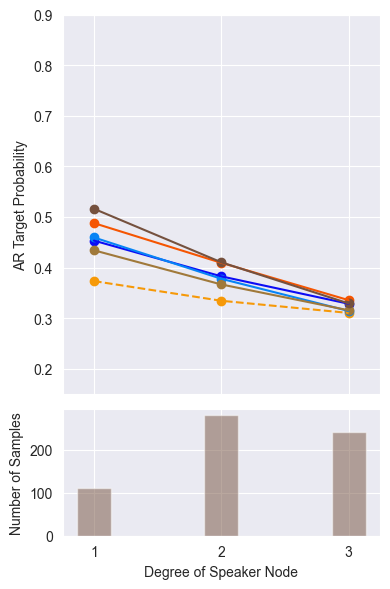

/Users/nicolopenzo/pythonProject/experimental_template_EMNLP2024/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicolopenzo/pythonProject/experimental_template_EMNLP2024/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


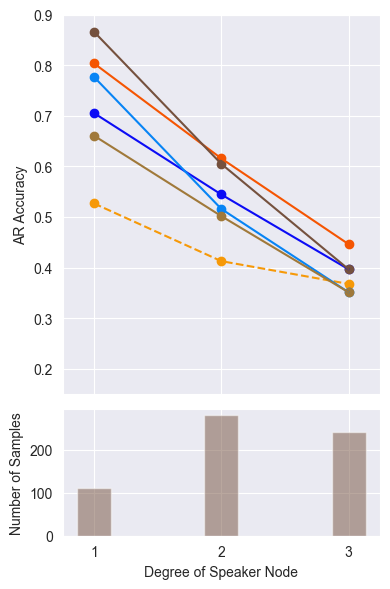

In [51]:
score_exam = score["undirected_degree"]
values = out_prob_total
x_label = 'Degree of Speaker Node'
y_label = ['AR Target Probability', 'Number of Samples']
save_name = 'best_ar_degree_ubuntu4_prob.pdf'
bin_width = 1

plot_statistic(score_exam, values, x_label, y_label, save_name, bin_width, best)

values = row_total
y_label = ['AR Accuracy', 'Number of Samples']
save_name = 'best_ar_degree_ubuntu4_out.svg'

plot_statistic(score_exam, values, x_label, y_label, save_name, bin_width, best)

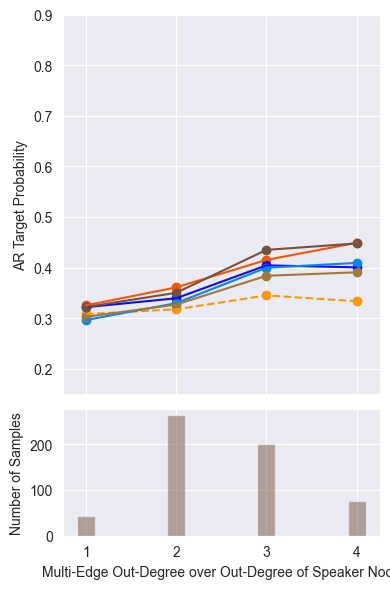

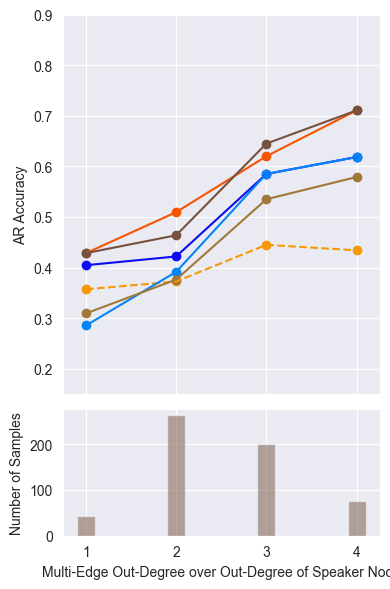

In [52]:
score_exam = [x / y if y != 0 else 0 for x, y in zip(score[("multi_out_degree")], score["directed_out_degree"])]

values = out_prob_total
x_label = ('Multi-Edge Out-Degree over Out-Degree of Speaker Node')
y_label = ['AR Target Probability', 'Number of Samples']
save_name = 'best_ar_ratio_out_degree_ubuntu4_prob.pdf'
bin_width = 1

plot_statistic(score_exam, values, x_label, y_label, save_name, bin_width, best)

values = row_total
y_label = ['AR Accuracy', 'Number of Samples']
save_name = 'best_ar_ratio_out_degree_ubuntu4_out.svg'

plot_statistic(score_exam, values, x_label, y_label, save_name, bin_width, best)